In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.autograd import Variable
import sklearn
import sklearn.model_selection
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score, log_loss
torch.cuda.get_device_name(0)

'GeForce GTX 1080'

In [2]:
dataset = pd.read_csv('C:/Users/pc/Desktop/dataset/dataset.csv')
X = dataset.iloc[:,:-1]
column_names = list(X.columns.values)
features = len(column_names)
y = dataset.iloc[:,-1]
y = y.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=164, test_size=0.3)

In [3]:
def x_ToTensor(array):
    array = np.array(array, dtype=np.float32) 
    return Variable(torch.from_numpy(array)).type(torch.FloatTensor)

def y_ToTensor(array):
    array = np.array(array.astype(int))
    return Variable(torch.from_numpy(array)).type(torch.FloatTensor)

x_tensor_train = x_ToTensor(x_train).cuda()
y_tensor_train = y_ToTensor(y_train).cuda()
x_tensor_test = x_ToTensor(x_test).cuda()
y_tensor_test = y_ToTensor(y_test).cuda()

0 0.72345406
50 0.68975663
100 0.65127987
150 0.63997155
200 0.62442654
250 0.5545578
300 0.5715458
350 0.5038876
400 0.49775654
450 0.46916074
500 0.47195625
550 0.45667493
600 0.44537514
650 0.44558188
700 0.45243248
750 0.4449256
800 0.45380956
850 0.45771104
900 0.43960816
950 0.4251084
1000 0.4178647
1050 0.43506756
1100 0.45430437
1150 0.4149304
1200 0.42391893
1250 0.4248551
1300 0.43239704
1350 0.41904542
1400 0.4086749
1450 0.41963583
1500 0.42605308
1550 0.45091215
1600 0.4146093
1650 0.41587582
1700 0.42634696
1750 0.41744363
1800 0.4082235
1850 0.42891285
1900 0.42945325
1950 0.40209034
2000 0.4046303
2050 0.44256032
2100 0.4237452
2150 0.40860373
2200 0.41195202
2250 0.41564682
2300 0.41258618
2350 0.42440796
2400 0.4206153
2450 0.41713932
2500 0.4175716
2550 0.41502556
2600 0.393676
2650 0.416597
2700 0.39422852
2750 0.42401326
2800 0.40211657
2850 0.39481372
2900 0.40736544
2950 0.41777548
3000 0.4060042
3050 0.41224056
3100 0.40657333
3150 0.41715765
3200 0.40011477
325

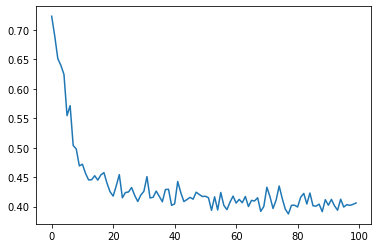

Train_accuracy :  0.8186813186813187
Test_accuracy :  0.7006369426751592


In [4]:
Drop_Prob = 0.9

LR = 0.001
dropout = torch.nn.Dropout(p=1 - (Drop_Prob))

hidden1_Size=512
hidden2_Size=int(hidden1_Size/4)
hidden3_Size=int(hidden1_Size/8)
hidden4_Size=int(hidden1_Size/16)
hidden5_Size=int(hidden1_Size/32)

linear1=torch.nn.Linear(features, hidden1_Size, bias=True) 
linear2=torch.nn.Linear(hidden1_Size, hidden2_Size, bias=True)
linear3=torch.nn.Linear(hidden2_Size, hidden3_Size, bias=True)
linear4=torch.nn.Linear(hidden3_Size, hidden4_Size, bias=True)
linear5=torch.nn.Linear(hidden4_Size, hidden5_Size, bias=True)
linear6=torch.nn.Linear(hidden5_Size, 1)
sigmoid = torch.nn.Sigmoid()
threshold = nn.Threshold(0.5, 0)
relu=torch.nn.LeakyReLU()

net = torch.nn.Sequential(linear1,nn.BatchNorm1d(hidden1_Size),relu,
                          linear2,dropout,relu,
                          linear3,dropout,relu,
                          linear4,dropout,relu,
                          linear5,dropout,relu,
                          linear6,dropout,relu,
                          sigmoid
                          )

net=net.cuda()
optimizer = torch.optim.Adam(net.parameters(), lr=LR,weight_decay=5e-3)
loss_func=torch.nn.BCELoss()
epochs = 5000
all_losses = []

for step in range(epochs):    
    out = net(x_tensor_train)                 
    cost = loss_func(out, y_tensor_train) 
    optimizer.zero_grad()   
    cost.backward()         
    optimizer.step()        
        
    if step % 50 == 0:        
        loss = cost.data
        all_losses.append(loss)
        print(step, cost.data.cpu().numpy()) 
        
prediction_train = (net(x_tensor_train).data).float()
pred_y_train = prediction_train.cpu().numpy().squeeze()
target_y_train = y_tensor_train.cpu().data.numpy()
pred_y_train = pred_y_train > 0.5

prediction_test = (net(x_tensor_test).data).float()
pred_y_test = prediction_test.cpu().numpy().squeeze()
target_y_test = y_tensor_test.cpu().data.numpy()
pred_y_test = pred_y_test > 0.5

%matplotlib inline
plt.plot(all_losses)
plt.show()
print('Train_accuracy : ', accuracy_score(target_y_train, pred_y_train))
print('Test_accuracy : ', accuracy_score(target_y_test, pred_y_test))